# Libraries

In [1]:
import numpy as np
import numpy.linalg as linalg
import pandas as pd

import matplotlib.pyplot as plt

from scipy.spatial import Delaunay
from pyhull.delaunay import DelaunayTri

from tabulate import tabulate

# My Libraries


In [2]:
from libraries.Spectrum import *
from libraries.MyPlot import *
import libraries.MyMath as mm
import libraries.MyOutput as output

# Initial Data

In [3]:
# OUT PUT MODE => 0 = Terminal Output, 1 = File Output
OUTPUT = 0

MUNSELL_FOR_EIGEN = 1
MUNSELL_AS_SAMPLE = 0

PLOT_ALL_SAMPLES = 0

MUTUAL_SAMPLES = 1

if OUTPUT:
    makeout()
    output.makeout()

start_wave, end_wave = 400, 700
data_size = 31
distance = (end_wave - start_wave) / (data_size - 1)

blue_sample_num, yellow_sample_num, red_sample_num = 7, 7, 7

maxRMS = 0.001
precise = 6

"""
Creating Wave lengths array for plots
Creating Example Data for checking plots
"""
# [400, 410, 420, ..., 700]
wave_length = mm.array_distance(400, distance, 700)

# [1, 1, 1, ..., 1]
example_data = mm.array_repeat(1, data_size)

"""
Start Getting Data From Excel file
"""
data = pd.read_excel("data/data.xls")

extract_data = pd.DataFrame(data, columns=["c"])
c = extract_data.to_numpy()
c = mm.cleanNaN(c)

R_red = []
for i in range(1, red_sample_num + 1):
    extract_data = pd.DataFrame(data, columns=["r" + str(i)])
    R_red.append(extract_data.to_numpy())

R_yellow = []
for i in range(1, yellow_sample_num + 1):
    extract_data = pd.DataFrame(data, columns=["y" + str(i)])
    R_yellow.append(extract_data.to_numpy())

R_blue = []
for i in range(1, blue_sample_num + 1):
    extract_data = pd.DataFrame(data, columns=["b" + str(i)])
    R_blue.append(extract_data.to_numpy())


extract_data = pd.DataFrame(data, columns=["Rsub"])
R_sub = extract_data.to_numpy()
k_sub = mm.applyFunction(R_sub, find_KOVERS)

extract_data = pd.DataFrame(data, columns=["Rstd"])
R_std = extract_data.to_numpy()
k_std = mm.applyFunction(R_std, find_KOVERS)

extract_data = pd.DataFrame(data, columns=["xbar"])
xbar = extract_data.to_numpy()

extract_data = pd.DataFrame(data, columns=["ybar"])
ybar = extract_data.to_numpy()

extract_data = pd.DataFrame(data, columns=["zbar"])
zbar = extract_data.to_numpy()

viewer = Viewer(xbar, ybar, zbar)

extract_data = pd.DataFrame(data, columns=["D65"])
E_D65 = extract_data.to_numpy()
light_source = LightSource(E_D65)

# Principal Component Analysis
munsell_size = 1269
munsell_R = []
data = pd.read_excel("data/Munsell400_10_700.xlsx")
for i in range(munsell_size):
    newdata = data[data.columns[i]]
    newdata = newdata.to_numpy()
    munsell_R.append(newdata)
munsell_R = np.array(munsell_R).T

R_mean = np.array([[sum(row) for row in munsell_R]])
R_mean = R_mean.T / munsell_size

# K OVER S for dyes

In [4]:
# initial object to find K OVER S for Blue Dye
BBB = Dye(blue_sample_num, data_size)
BBB.setR(R_blue)
BBB.setC(c)
BBB.setSub(R_sub)


# initial object to find K OVER S for Red Dye
RRR = Dye(red_sample_num, data_size)
RRR.setR(R_red)
RRR.setC(c)
RRR.setSub(R_sub)


# initial object to find K OVER S for Yellow Dye
YYY = Dye(yellow_sample_num, data_size)
YYY.setR(R_yellow)
YYY.setC(c)
YYY.setSub(R_sub)

blue_KOVERS = BBB.getKOVERS()
red_KOVERS = RRR.getKOVERS()
yellow_KOVERS = YYY.getKOVERS()

# Analyze current data

╒══════════╤══════════╕
│   λ (nm) │   R mean │
╞══════════╪══════════╡
│      400 │ 0.200129 │
├──────────┼──────────┤
│      410 │ 0.236099 │
├──────────┼──────────┤
│      420 │ 0.241812 │
├──────────┼──────────┤
│      430 │ 0.242393 │
├──────────┼──────────┤
│      440 │ 0.244273 │
├──────────┼──────────┤
│      450 │ 0.244456 │
├──────────┼──────────┤
│      460 │ 0.247558 │
├──────────┼──────────┤
│      470 │ 0.253809 │
├──────────┼──────────┤
│      480 │ 0.259072 │
├──────────┼──────────┤
│      490 │ 0.260861 │
├──────────┼──────────┤
│      500 │ 0.265252 │
├──────────┼──────────┤
│      510 │ 0.271235 │
├──────────┼──────────┤
│      520 │ 0.273932 │
├──────────┼──────────┤
│      530 │ 0.272343 │
├──────────┼──────────┤
│      540 │ 0.271389 │
├──────────┼──────────┤
│      550 │ 0.275688 │
├──────────┼──────────┤
│      560 │ 0.276153 │
├──────────┼──────────┤
│      570 │ 0.282978 │
├──────────┼──────────┤
│      580 │ 0.287722 │
├──────────┼──────────┤
│      590 │ 0.2

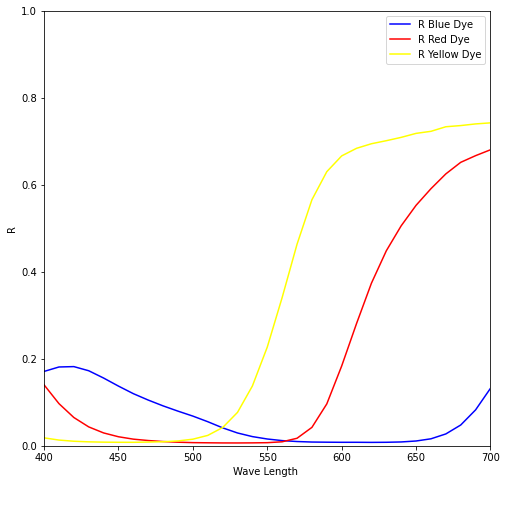

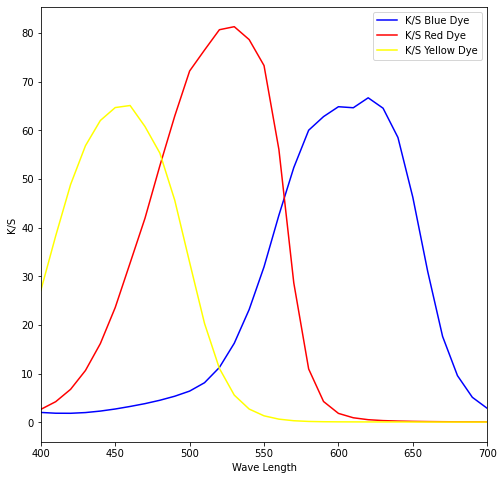

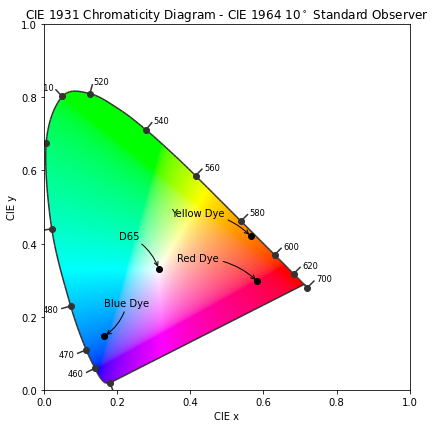

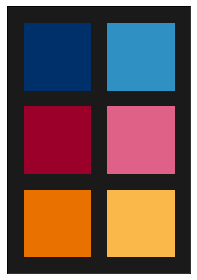

In [5]:
print(
    tabulate(
        {"λ (nm)": wave_length, "R mean": R_mean}, headers="keys", tablefmt="fancy_grid"
    )
)

(p1,) = plt.plot(wave_length, BBB.getR(), color="blue", label="R Blue Dye")
(p2,) = plt.plot(wave_length, RRR.getR(), color="red", label="R Red Dye")
(p3,) = plt.plot(wave_length, YYY.getR(), color="yellow", label="R Yellow Dye")
lines = [p1, p2, p3]
draw_R_style1(lines)

print()

(p1,) = plt.plot(wave_length, BBB.getKOVERS(), color="blue", label="K/S Blue Dye")
(p2,) = plt.plot(wave_length, RRR.getKOVERS(), color="red", label="K/S Red Dye")
(p3,) = plt.plot(wave_length, YYY.getKOVERS(), color="yellow", label="K/S Yellow Dye")
lines = [p1, p2, p3]
draw_KoverS_style1(lines)

print()

# D65
OBS1 = Observation(light_source, viewer, 1, "D65")
Mix = Mixture(R_sub)

# Blue 1
Mix.clear()
Mix.add(1, blue_KOVERS)
OBS2 = Observation(light_source, viewer, Mix.getR(), "Blue Dye")
# Red 1
Mix.clear()
Mix.add(1, red_KOVERS)
OBS3 = Observation(light_source, viewer, Mix.getR(), "Red Dye")
# Yellow 1
Mix.clear()
Mix.add(1, yellow_KOVERS)
OBS4 = Observation(light_source, viewer, Mix.getR(), "Yellow Dye")

# Blue 0.05
Mix.clear()
Mix.add(0.05, blue_KOVERS)
OBS5 = Observation(light_source, viewer, Mix.getR(), "Blue Dye")
# Red 0.05
Mix.clear()
Mix.add(0.05, red_KOVERS)
OBS6 = Observation(light_source, viewer, Mix.getR(), "Red Dye")
# Yellow 0.05
Mix.clear()
Mix.add(0.05, yellow_KOVERS)
OBS7 = Observation(light_source, viewer, Mix.getR(), "Yellow Dye")

color_points = [OBS1, OBS2, OBS3, OBS4]
draw_CIE1931(color_points)

draw_rgb_from_XYZ(OBS2.getXYZ(), "Blue Dye", False)
draw_rgb_from_XYZ(OBS5.getXYZ(), "Blue Dye", False)

draw_rgb_from_XYZ(OBS3.getXYZ(), "Red Dye", False)
draw_rgb_from_XYZ(OBS6.getXYZ(), "Red Dye", False)

draw_rgb_from_XYZ(OBS4.getXYZ(), "Yellow Dye", False)
draw_rgb_from_XYZ(OBS7.getXYZ(), "Yellow Dye", False)

draw_rgb_from_all()
resetSwatch()

# Same R Substrate for New Surface

In [6]:
R_sub = R_sub
# R_sub = np.array([mm.array_repeat(1, data_size)]).T

# Creating Look up Table


3 EigenVectors with Highest EigenValues
[[ 0.09483373 -0.11570643  0.15767145  0.13502343  0.04227553  0.01537553
   0.68705186  0.16506011 -0.52088994  0.21078248  0.04803513 -0.0775283
  -0.1955709  -0.07689112 -0.0691027   0.21392313  0.10883411 -0.02842454
  -0.00742043 -0.00944698 -0.01158433  0.01219628 -0.02104421  0.00348477
   0.01504926  0.00114911 -0.0121234   0.01790183 -0.00452232  0.00973035
   0.01003395]
 [ 0.1353475  -0.17545023  0.22671522  0.17301411  0.11678183 -0.02452445
   0.35124184  0.00246697  0.08137825 -0.13064751  0.01078028  0.14796422
   0.25835749  0.15818254  0.20203634 -0.63119229 -0.32125463  0.10558092
   0.0522483   0.03052858  0.07833556 -0.0358999   0.06553649 -0.01263544
  -0.05519987  0.03308766  0.08367907 -0.09461422  0.02463634 -0.05065704
  -0.0457393 ]
 [ 0.14416032 -0.19511855  0.23874847  0.1654432   0.14683691 -0.03530315
   0.12764635 -0.07413782  0.32175717 -0.2252548   0.02033118  0.16128194
   0.24043937  0.0154536   0.01312359  0.3

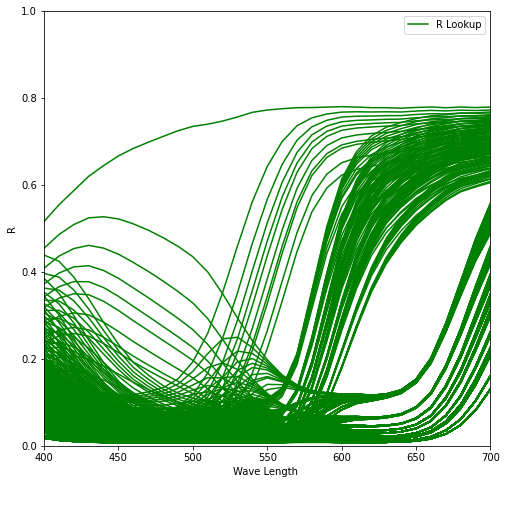

+------+-----+-------------------------------+-------------------------------+---------------------+
|  No  |  R  |              PCC              |              XYZ              |  C Blue Red Yellow  |
+------+-----+-------------------------------+-------------------------------+---------------------+
|  1   | ... |   [ 0.32658143  0.28653308    |  [ 71.27860175  75.91201119   |    [ 0.  0.  0.]    |
|      |     |          0.41703341]          |         71.09772213]          |                     |
+------+-----+-------------------------------+-------------------------------+---------------------+
|  2   | ... |   [-0.03747928 -0.26172553    |  [ 57.81562194  55.29692836   | [ 0.    0.    0.05] |
|      |     |         -0.11128047]          |         14.11801495]          |                     |
+------+-----+-------------------------------+-------------------------------+---------------------+
|  3   | ... |    [-0.06579433 -0.320714     |  [ 54.59205621  49.62188295   |  [ 0.   0.  

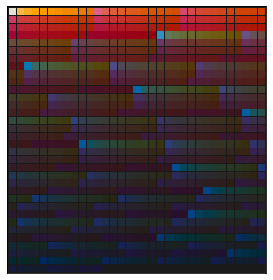

In [7]:
Dis1 = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.35, 0.45, 0.5, 0.75, 1])
Dis2 = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.35, 0.45, 0.5, 0.75, 1])
Dis3 = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.35, 0.45, 0.5, 0.75, 1])
pr = len(Dis1)

dim = 3

R_Lookup = []
XYZ_Lookup = []
C_Lookup = []
PCC_Lookup = []

Mix = Mixture(R_sub)
for x in range(pr):
    for y in range(pr):
        for z in range(pr):
            if (Dis1[x] + Dis2[y] + Dis3[z]) > 1.5:
                continue
            Mix.clear()
            Mix.add(Dis1[x], blue_KOVERS)
            Mix.add(Dis2[y], red_KOVERS)
            Mix.add(Dis3[z], yellow_KOVERS)
            Temp = Observation(light_source, viewer, Mix.getR())
            XYZ_Lookup.append([Temp.getX(), Temp.getY(), Temp.getZ()])
            C_Lookup.append([Dis1[x], Dis2[y], Dis3[z]])
            R_Lookup.append(Mix.getR().T[0])

# Eigen Vector & Value
if MUNSELL_FOR_EIGEN:
    munsell_A = np.cov(munsell_R)
    eigenValues, eigenVectors = linalg.eig(munsell_A)
    idx = eigenValues.argsort()[::-1]
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]
else:
    R_Lookup = np.array(R_Lookup)
    lookup_A = np.cov(R_Lookup.T)
    eigenValues, eigenVectors = linalg.eig(lookup_A)
    idx = eigenValues.argsort()[::-1]
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]

# print(eigenVectors)
print("\n3 EigenVectors with Highest EigenValues")
print(eigenVectors[0:3])
print("\n3 Highest EigenValues")
print(eigenValues[0:3])
print()

for i in range(len(R_Lookup)):
    PCC_Lookup.append(mm.PC(R_Lookup[i], dim, eigenVectors, R_mean))
    (p1,) = plt.plot(wave_length, R_Lookup[i], color="green", label="R Lookup")
    lines = [p1]
    OBS_new = Observation(light_source, viewer, R_Lookup[i], "", "green")
    draw_rgb_from_XYZ(OBS_new.getXYZ(), " ", False)

draw_R_style1(lines)

draw_rgb_from_all()
resetSwatch()

R_Lookup = np.array(R_Lookup)
XYZ_Lookup = np.array(XYZ_Lookup)
C_Lookup = np.array(C_Lookup)
PCC_Lookup = np.array(PCC_Lookup)

Table = []
Table.append(
    [
        "No",
        "R",
        "PCC",
        "XYZ",
        "C Blue Red Yellow",
    ]
)

for i in range(len(R_Lookup)):
    R_Temp = "..."
    if OUTPUT == 1:
        R_Temp = np.round(R_Lookup[i], 3)

    Table.append(
        [
            i + 1,
            R_Temp,
            PCC_Lookup[i],
            XYZ_Lookup[i],
            C_Lookup[i],
        ]
    )

output.save(Table, "Lookup_table")
print()
print(Dis1)

# Creating Samples to Evaluate Methods

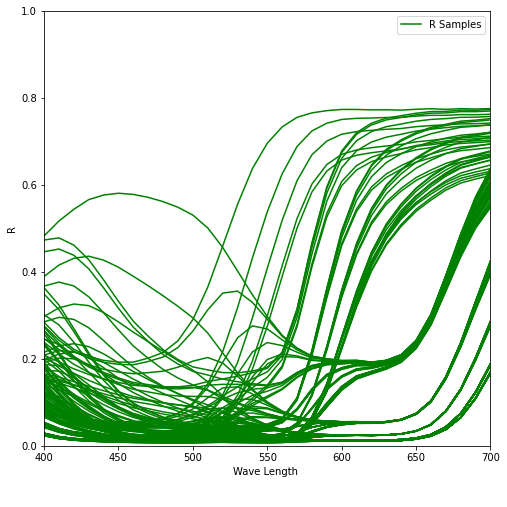

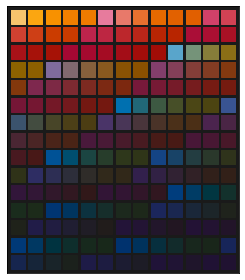

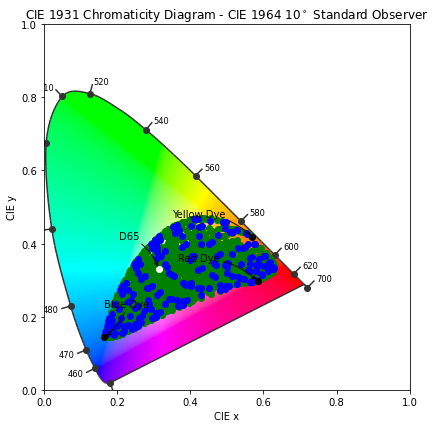

+-----+-----+------------------------------+------------------------------+------------------------+
| No  |  R  |             PCC              |             XYZ              |   C Blue Red Yellow    |
+-----+-----+------------------------------+------------------------------+------------------------+
|  1  | ... |  [ 60.74434686  60.47855796  |   [ 0.00593456 -0.17191345   | [ 0.     0.     0.025] |
|     |     |         22.47427295]         |         -0.00385115]         |                        |
+-----+-----+------------------------------+------------------------------+------------------------+
|  2  | ... |  [ 53.45822429  47.71623473  |   [-0.07274329 -0.33179942   | [ 0.     0.     0.125] |
|     |     |         6.80002474]          |         -0.23519158]         |                        |
+-----+-----+------------------------------+------------------------------+------------------------+
|  3  | ... |  [ 48.33034838  39.97548035  |   [-0.09656339 -0.33863417   |    [ 0.   0.   

In [8]:
Dis1 = np.array([0, 0.025, 0.125, 0.3, 0.6, 0.7])
Dis2 = np.array([0, 0.025, 0.125, 0.3, 0.6, 0.7])
Dis3 = np.array([0, 0.025, 0.125, 0.3, 0.6, 0.7])
pr = len(Dis1)

R_Samples = []
XYZ_Samples = []
C_Samples = []
PCC_Samples = []

if MUNSELL_AS_SAMPLE:
    for R_T in munsell_R.T:
        Temp = Observation(light_source, viewer, R_T)
        XYZ_Samples.append([Temp.getX(), Temp.getY(), Temp.getZ()])
        C_Samples.append([0, 0, 0])
        R_Samples.append(R_T)
        PCC_Samples.append(mm.PC(R_T, dim, eigenVectors, R_mean))
else:
    Mix = Mixture(R_sub)
    for x in range(pr):
        for y in range(pr):
            for z in range(pr):
                if (Dis1[x] + Dis2[y] + Dis3[z]) > 1.5 or (
                    Dis1[x] + Dis2[y] + Dis3[z]
                ) == 0:
                    continue
                Mix.clear()
                Mix.add(Dis1[x], blue_KOVERS)
                Mix.add(Dis2[y], red_KOVERS)
                Mix.add(Dis3[z], yellow_KOVERS)
                Temp = Observation(light_source, viewer, Mix.getR())
                XYZ_Samples.append([Temp.getX(), Temp.getY(), Temp.getZ()])
                C_Samples.append([Dis1[x], Dis2[y], Dis3[z]])
                R_Samples.append(Mix.getR().T[0])
                PCC_Samples.append(mm.PC(Mix.getR().T[0], dim, eigenVectors, R_mean))

R_Samples = np.array(R_Samples)
XYZ_Samples = np.array(XYZ_Samples)
C_Samples = np.array(C_Samples)
PCC_Samples = np.array(PCC_Samples)


all_pointes = []

for i in R_Lookup:
    OBS_new = Observation(light_source, viewer, i, "", "green")
    all_pointes.append(OBS_new)

for i in range(len(R_Samples)):
    (p1,) = plt.plot(wave_length, R_Samples[i], color="green", label="R Samples")
    lines = [p1]
    OBS_new = Observation(light_source, viewer, R_Samples[i], "", "blue")
    all_pointes.append(OBS_new)
    draw_rgb_from_XYZ(OBS_new.getXYZ(), "Sample " + str(i), False)

draw_R_style1(lines)

draw_rgb_from_all()
resetSwatch()

# Blue
OBS_new = Observation(light_source, viewer, BBB.getR(), "Blue Dye", "black")
all_pointes.append(OBS_new)
# Red
OBS_new = Observation(light_source, viewer, RRR.getR(), "Red Dye", "black")
all_pointes.append(OBS_new)
# Yellow
OBS_new = Observation(light_source, viewer, YYY.getR(), "Yellow Dye", "black")
all_pointes.append(OBS_new)
# D65
OBS_new = Observation(light_source, viewer, 1, "D65", "white")
all_pointes.append(OBS_new)

draw_CIE1931(all_pointes)

Table = []
Table.append(
    [
        "No",
        "R",
        "PCC",
        "XYZ",
        "C Blue Red Yellow",
    ]
)

for i in range(len(R_Samples)):
    R_Temp = "..."
    if OUTPUT == 1:
        R_Temp = np.round(R_Samples[i], 3)

    Table.append(
        [
            i + 1,
            R_Temp,
            XYZ_Samples[i],
            PCC_Samples[i],
            C_Samples[i],
        ]
    )

output.save(Table, "Samples_table")
total_count = len(R_Samples)
print()
R_calc = MyDelaunay(PCC_Lookup)
XYZ_calc = MyDelaunay(XYZ_Lookup)
print(Dis1)

# Method 1 Interpolation using R with reduced dimension Based on PCA (3D) => Project purpose

mean RMS:  0.156621821563
mean ΔE:  9.52116681368
mean ΔC:  0.135376288934
mean GFC:  0.983686885181
Min RMS:  0.00172649703225
Max RMS:  2.13648970156
Min ΔE:  0.0182503964865
Max ΔE:  86.3842262426
Min ΔC:  0.0021718361667
Max ΔC:  0.825595196936
Min GFC:  0.727393702173
Max GFC:  0.999999708193


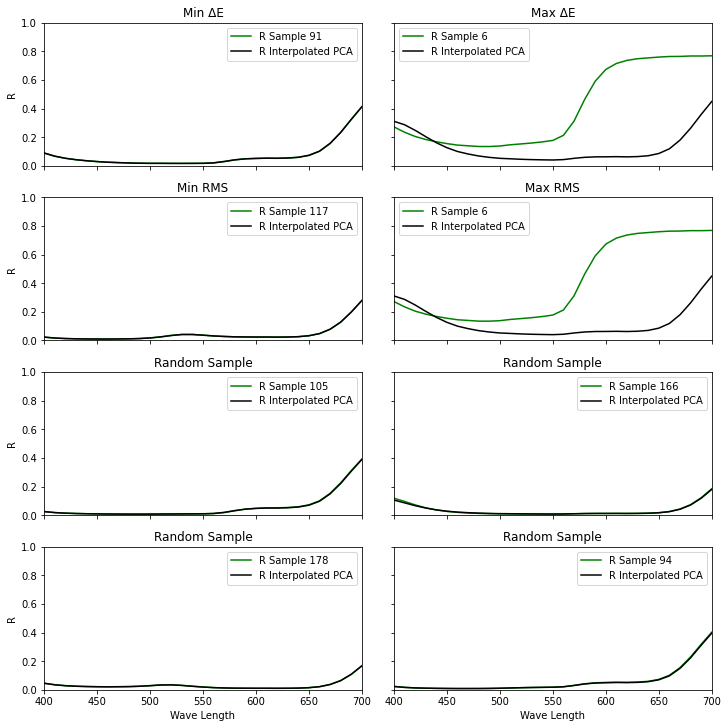

In [9]:
count1 = 0

""" Another method to calculate with delaunay
    from scipy.interpolate import NearestNDInterpolator
    why = LinearNDInterpolator(R_Lookup,C_Lookup)
    why = NearestNDInterpolator(R_Lookup,C_Lookup)
    print("lib",why(R_Find))
"""

# Result
M_R_RMS, M_R_DeltaE, M_R_DeltaC, M_R_GFC = 0, 0, 0, 0

M_R_minRMS, M_R_maxRMS = 0, 0
M_R_minRMS_no, M_R_maxRMS_no = -1, -1

M_R_minE, M_R_maxE = 0, 0
M_R_minE_no, M_R_maxE_no = -1, -1

M_R_minC, M_R_maxC = 0, 0

M_R_minGFC, M_R_maxGFC = 0, 0
M_R_minGFC_no, M_R_maxGFC_no = -1, -1

Method_PCC_R = {}
for i in range(len(R_Samples)):
    R_std = R_Samples[i]
    R_Find = PCC_Samples[i]

    try:
        res = R_calc.getResult(R_Find, C_Lookup)
    except Exception:
        continue
    if MUTUAL_SAMPLES:
        try:
            XYZ_calc.getResult(XYZ_Samples[i], C_Lookup)
        except Exception:
            continue

    count1 += 1
    C_Inter = res[0]

    Mix.clear()
    Mix.add(C_Inter[0], blue_KOVERS)
    Mix.add(C_Inter[1], red_KOVERS)
    Mix.add(C_Inter[2], yellow_KOVERS)
    R_Inter = Mix.getR()
    Method_PCC_R[i] = R_Inter

    Inter = Observation(light_source, viewer, R_Inter)
    STD = Observation(light_source, viewer, R_std)

    compare = Compare(STD, Inter)
    RMS_Inter = compare.RMS()
    DeltaE_Inter = compare.delta_E()
    GFC_Inter = compare.GFC()
    DeltaC_Inter = mm.RMS(C_Samples[i], C_Inter)

    text_R = "R: " + str(R_std)
    text_RMS = "RMS: " + str(RMS_Inter)
    text_DeltaE = "ΔE: " + str(DeltaE_Inter)
    text_GFC = "GFC: " + str(GFC_Inter)
    text_C_Real = "Real C: " + str(C_Samples[i])
    text_C_Cal = "Interpolated C: " + str(C_Inter)

    text_all = (
        text_RMS
        + "\n"
        + text_DeltaE
        + "\n"
        + text_GFC
        + "\n"
        + text_C_Real
        + "\n"
        + text_C_Cal
        + "\n\n"
        + text_R
    )

    # Result
    M_R_RMS = M_R_RMS + RMS_Inter
    M_R_DeltaE = M_R_DeltaE + DeltaE_Inter
    M_R_DeltaC = M_R_DeltaC + DeltaC_Inter
    M_R_GFC = M_R_GFC + GFC_Inter

    if count1 == 1:
        M_R_minRMS = RMS_Inter
        M_R_maxRMS = RMS_Inter

        M_R_minC = DeltaC_Inter
        M_R_maxC = DeltaC_Inter

        M_R_minGFC = GFC_Inter
        M_R_maxGFC = GFC_Inter

        M_R_minE = DeltaE_Inter
        M_R_maxE = DeltaE_Inter

        (
            M_R_minRMS_no,
            M_R_maxRMS_no,
            M_R_minE_no,
            M_R_maxE_no,
            M_R_minGFC_no,
            M_R_maxGFC_no,
        ) = (i, i, i, i, i, i)

    if RMS_Inter < M_R_minRMS:
        M_R_minRMS = RMS_Inter
        M_R_minRMS_no = i

    if RMS_Inter > M_R_maxRMS:
        M_R_maxRMS = RMS_Inter
        M_R_maxRMS_no = i

    if DeltaE_Inter < M_R_minE:
        M_R_minE = DeltaE_Inter
        M_R_minE_no = i

    if DeltaE_Inter > M_R_maxE:
        M_R_maxE = DeltaE_Inter
        M_R_maxE_no = i

    if DeltaC_Inter < M_R_minC:
        M_R_minC = DeltaC_Inter

    if DeltaC_Inter > M_R_maxC:
        M_R_maxC = DeltaC_Inter

    if GFC_Inter < M_R_minGFC:
        M_R_minGFC = GFC_Inter
        M_R_minGFC_no = i

    if GFC_Inter > M_R_maxGFC:
        M_R_maxGFC = GFC_Inter
        M_R_maxGFC_no = i

    if PLOT_ALL_SAMPLES:
        (p1,) = plt.plot(
            wave_length, R_std, color="green", label="R Sample " + str(i + 1)
        )
        (p2,) = plt.plot(
            wave_length, R_Inter, color="black", label="R Interpolated (PCA)"
        )
        lines = [p1, p2]
        draw_R_style1(lines, comment=text_all)

# Result - Plot
array = [M_R_minE_no, M_R_maxE_no, M_R_minRMS_no, M_R_maxRMS_no]
draw_R_subplot_style1(R_Samples, Method_PCC_R, array, "PCA")

# Result
M_R_RMS = M_R_RMS / count1
M_R_DeltaE = M_R_DeltaE / count1
M_R_DeltaC = M_R_DeltaC / count1
M_R_GFC = M_R_GFC / count1

print("mean RMS: ", M_R_RMS)
print("mean ΔE: ", M_R_DeltaE)
print("mean ΔC: ", M_R_DeltaC)
print("mean GFC: ", M_R_GFC)
print("Min RMS: ", M_R_minRMS)
print("Max RMS: ", M_R_maxRMS)
print("Min ΔE: ", M_R_minE)
print("Max ΔE: ", M_R_maxE)
print("Min ΔC: ", M_R_minC)
print("Max ΔC: ", M_R_maxC)
print("Min GFC: ", M_R_minGFC)
print("Max GFC: ", M_R_maxGFC)

# Method 2 Interpolation using XYZ => For Comparison

mean RMS:  0.0538831090525
mean ΔE:  3.48320033724
mean ΔC:  0.0502901326268
mean GFC:  0.999083704339
Min RMS:  0.00266040603846
Max RMS:  0.521660253984
Min ΔE:  0.367523329376
Max ΔE:  28.3284889301
Min ΔC:  0.00610895842398
Max ΔC:  0.323867620351
Min GFC:  0.988616118792
Max GFC:  0.999997808264


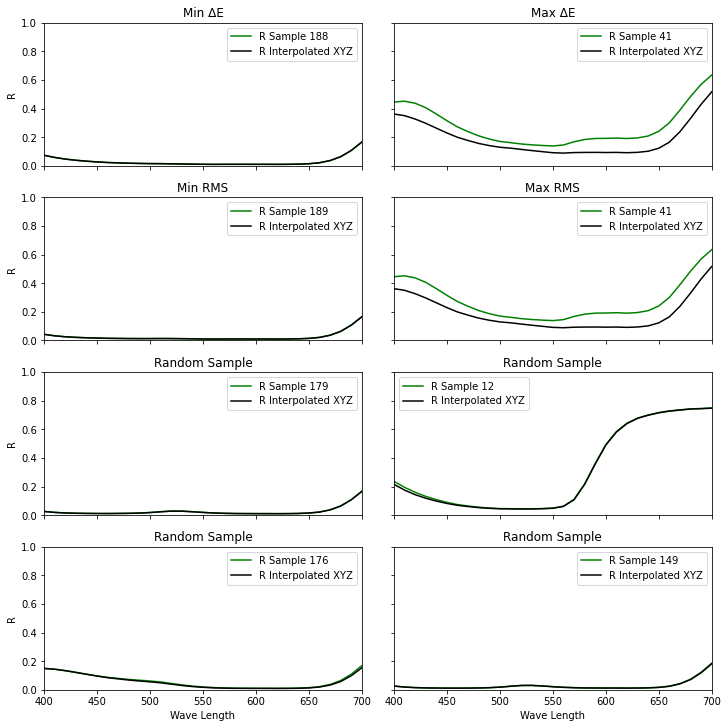

In [10]:
count2 = 0

# Result
M_XYZ_RMS, M_XYZ_DeltaE, M_XYZ_DeltaC, M_XYZ_GFC = 0, 0, 0, 0

M_XYZ_minRMS, M_XYZ_maxRMS = 0, 0
M_XYZ_minRMS_no, M_XYZ_maxRMS_no = -1, -1

M_XYZ_minE, M_XYZ_maxE = 0, 0
M_XYZ_minE_no, M_XYZ_maxE_no = -1, -1

M_XYZ_minC, M_XYZ_maxC = 0, 0

M_XYZ_minGFC, M_XYZ_maxGFC = 0, 0
M_XYZ_minGFC_no, M_XYZ_maxGFC_no = -1, -1

Method_XYZ_R = {}
for i in range(len(R_Samples)):
    # print(R_Samples[i])
    R_std = R_Samples[i]
    Find = XYZ_Samples[i]
    Temp = Observation(light_source, viewer, R_std)

    try:
        res = XYZ_calc.getResult(Find, C_Lookup)
    except Exception:
        continue
    if MUTUAL_SAMPLES:
        try:
            R_calc.getResult(PCC_Samples[i], C_Lookup)
        except Exception:
            continue

    count2 += 1
    C_Inter = res[0]

    Mix.clear()
    Mix.add(C_Inter[0], blue_KOVERS)
    Mix.add(C_Inter[1], red_KOVERS)
    Mix.add(C_Inter[2], yellow_KOVERS)
    R_Inter = Mix.getR()
    Method_XYZ_R[i] = R_Inter

    Inter = Observation(light_source, viewer, R_Inter)
    STD = Observation(light_source, viewer, R_std)
    compare = Compare(Inter, STD)
    RMS_Inter = compare.RMS()
    DeltaE_Inter = compare.delta_E()
    GFC_Inter = compare.GFC()
    DeltaC_Inter = mm.RMS(C_Samples[i], C_Inter)

    text_R = "R: " + str(R_std)
    text_RMS = "RMS: " + str(RMS_Inter)
    text_DeltaE = "ΔE: " + str(DeltaE_Inter)
    text_GFC = "GFC: " + str(GFC_Inter)
    text_C_Real = "Real C: " + str(C_Samples[i])
    text_C_Cal = "Interpolated C: " + str(C_Inter)

    text_all = (
        text_RMS
        + "\n"
        + text_DeltaE
        + "\n"
        + text_GFC
        + "\n"
        + text_C_Real
        + "\n"
        + text_C_Cal
        + "\n\n"
        + text_R
    )

    # Result
    M_XYZ_RMS = M_XYZ_RMS + RMS_Inter
    M_XYZ_DeltaE = M_XYZ_DeltaE + DeltaE_Inter
    M_XYZ_DeltaC = M_XYZ_DeltaC + DeltaC_Inter
    M_XYZ_GFC = M_XYZ_GFC + GFC_Inter

    if count2 == 1:
        M_XYZ_minRMS = RMS_Inter
        M_XYZ_maxRMS = RMS_Inter

        M_XYZ_minE = DeltaE_Inter
        M_XYZ_maxE = DeltaE_Inter

        M_XYZ_minC = DeltaC_Inter
        M_XYZ_maxC = DeltaC_Inter

        M_XYZ_minGFC = GFC_Inter
        M_XYZ_maxGFC = GFC_Inter

        (
            M_XYZ_minRMS_no,
            M_XYZ_maxRMS_no,
            M_XYZ_minE_no,
            M_XYZ_maxE_no,
            M_XYZ_minGFC_no,
            M_XYZ_maxGFC_no,
        ) = (i, i, i, i, i, i)

    if RMS_Inter < M_XYZ_minRMS:
        M_XYZ_minRMS = RMS_Inter
        M_XYZ_minRMS_no = i

    if RMS_Inter > M_XYZ_maxRMS:
        M_XYZ_maxRMS = RMS_Inter
        M_XYZ_maxRMS_no = i

    if DeltaE_Inter < M_XYZ_minE:
        M_XYZ_minE = DeltaE_Inter
        M_XYZ_minE_no = i

    if DeltaE_Inter > M_XYZ_maxE:
        M_XYZ_maxE = DeltaE_Inter
        M_XYZ_maxE_no = i

    if DeltaC_Inter < M_XYZ_minC:
        M_XYZ_minC = DeltaC_Inter

    if DeltaC_Inter > M_XYZ_maxC:
        M_XYZ_maxC = DeltaC_Inter

    if GFC_Inter < M_XYZ_minGFC:
        M_XYZ_minGFC = GFC_Inter
        M_XYZ_minGFC_no = i

    if GFC_Inter > M_XYZ_maxGFC:
        M_XYZ_maxGFC = GFC_Inter
        M_XYZ_maxGFC_no = i

    if PLOT_ALL_SAMPLES:
        (p1,) = plt.plot(
            wave_length, R_std, color="green", label="R Sample " + str(i + 1)
        )
        (p2,) = plt.plot(
            wave_length, R_Inter, color="black", label="R Interpolated (XYZ)"
        )
        lines = [p1, p2]
        draw_R_style1(lines, comment=text_all)

# Result - Plot
array = [M_XYZ_minE_no, M_XYZ_maxE_no, M_XYZ_minRMS_no, M_XYZ_maxRMS_no]
draw_R_subplot_style1(R_Samples, Method_XYZ_R, array, "XYZ")

# Result
M_XYZ_RMS = M_XYZ_RMS / count2
M_XYZ_DeltaE = M_XYZ_DeltaE / count2
M_XYZ_DeltaC = M_XYZ_DeltaC / count2
M_XYZ_GFC = M_XYZ_GFC / count2

print("mean RMS: ", M_XYZ_RMS)
print("mean ΔE: ", M_XYZ_DeltaE)
print("mean ΔC: ", M_XYZ_DeltaC)
print("mean GFC: ", M_XYZ_GFC)
print("Min RMS: ", M_XYZ_minRMS)
print("Max RMS: ", M_XYZ_maxRMS)
print("Min ΔE: ", M_XYZ_minE)
print("Max ΔE: ", M_XYZ_maxE)
print("Min ΔC: ", M_XYZ_minC)
print("Max ΔC: ", M_XYZ_maxC)
print("Min GFC: ", M_XYZ_minGFC)
print("Max GFC: ", M_XYZ_maxGFC)

# Showing Results

In [11]:
pr = 5
M_R_RMS = round(M_R_RMS, pr)
M_R_DeltaE = round(M_R_DeltaE, pr)
M_R_DeltaC = round(M_R_DeltaC, pr)
M_R_GFC = round(M_R_GFC, pr)
M_R_minRMS = round(M_R_minRMS, pr)
M_R_maxRMS = round(M_R_maxRMS, pr)
M_R_minE = round(M_R_minE, pr)
M_R_maxE = round(M_R_maxE, pr)
M_R_minC = round(M_R_minC, pr)
M_R_maxC = round(M_R_maxC, pr)
M_R_minGFC = round(M_R_minGFC, pr)
M_R_maxGFC = round(M_R_maxGFC, pr)

M_XYZ_RMS = round(M_XYZ_RMS, pr)
M_XYZ_DeltaE = round(M_XYZ_DeltaE, pr)
M_XYZ_DeltaC = round(M_XYZ_DeltaC, pr)
M_XYZ_GFC = round(M_XYZ_GFC, pr)
M_XYZ_minRMS = round(M_XYZ_minRMS, pr)
M_XYZ_maxRMS = round(M_XYZ_maxRMS, pr)
M_XYZ_minE = round(M_XYZ_minE, pr)
M_XYZ_maxE = round(M_XYZ_maxE, pr)
M_XYZ_minC = round(M_XYZ_minC, pr)
M_XYZ_maxC = round(M_XYZ_maxC, pr)
M_XYZ_minGFC = round(M_XYZ_minGFC, pr)
M_XYZ_maxGFC = round(M_XYZ_maxGFC, pr)


Table = []
Table.append(
    [
        "Method name",
        "Dimension",
        "Total",
        "in-gamut",
        "Mean RMS",
        "Mean ΔE",
        "Mean ΔC",
        "Mean GFC",
        "Min RMS",
        "Max RMS",
        "Min ΔE",
        "Max ΔE",
        "Min ΔC",
        "Max ΔC",
        "Min GFC",
        "Max GFC",
    ]
)

Table.append(
    [
        "Principal Component Coordinates",
        dim,
        total_count,
        count1,
        M_R_RMS,
        M_R_DeltaE,
        M_R_DeltaC,
        M_R_GFC,
        M_R_minRMS,
        M_R_maxRMS,
        M_R_minE,
        M_R_maxE,
        M_R_minC,
        M_R_maxC,
        M_R_minGFC,
        M_R_maxGFC,
    ]
)

Table.append(
    [
        "XYZ",
        "3",
        total_count,
        count2,
        M_XYZ_RMS,
        M_XYZ_DeltaE,
        M_XYZ_DeltaC,
        M_XYZ_GFC,
        M_XYZ_minRMS,
        M_XYZ_maxRMS,
        M_XYZ_minE,
        M_XYZ_maxE,
        M_XYZ_minC,
        M_XYZ_maxC,
        M_XYZ_minGFC,
        M_XYZ_maxGFC,
    ]
)

output.save(Table, "Result")
print("Finished!")

+------+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| Meth | Dime | Tota | in- | Mea | Mea | Mea | Mea | Min | Max | Min | Max | Min | Max | Min | Max |
|  od  | nsio |  l   | gam |  n  |  n  |  n  |  n  | RMS | RMS | ΔE  | ΔE  | ΔC  | ΔC  | GFC | GFC |
| name |  n   |      | ut  | RMS | ΔE  | ΔC  | GFC |     |     |     |     |     |     |     |     |
+------+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| Prin |      |      |     |     |     |     |     |     |     |     |     |     |     |     |     |
| cipa |      |      |     |     |     |     |     |     |     |     |     |     |     |     |     |
| l Co |      |      |     | 0.1 | 9.5 | 0.1 | 0.9 | 0.0 | 2.1 | 0.0 | 86. | 0.0 |     | 0.7 |     |
| mpon |  3   | 195  | 130 | 566 | 211 | 353 | 836 | 017 | 364 | 182 | 384 | 021 | 0.8 | 273 | 1.0 |
| ent  |      |      |     |  2  |  7  |  8  |  9  |  3  |  9  |  5  | 23  |  7  | 256 |  9